## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
merge_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
count_mice = merge_data["Mouse ID"].nunique()
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merge_data.loc[merge_data.duplicated(["Mouse ID", "Timepoint"])]

duplicated_mice["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= merge_data.loc[merge_data["Mouse ID"]!="g989"]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean_data = clean_data["Mouse ID"].nunique()
count_clean_data

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#group the data by Drug Regimen
group_data = clean_data.groupby("Drug Regimen")

#Get the mean volume of the tumor 
mean_value = round(group_data["Tumor Volume (mm3)"].mean(),2)

#Get the median volume of the tumor
median_value = round(group_data["Tumor Volume (mm3)"].median(),2)

#Get the variance of the Tumor Volume
var_value = round(group_data["Tumor Volume (mm3)"].var(),2)

#Get the Standard Deviation of the Tumor Volume
std_value = round(group_data["Tumor Volume (mm3)"].std(),2)

#Get the SEM of the Tumor Volume
sem_value = round(group_data["Tumor Volume (mm3)"].sem(),2)

#Created a summary DataFrame to store the result
summary_df = pd.DataFrame({"Mean Value": mean_value,
                          "Median Value": median_value,
                          "Variance": var_value,
                          "Standard Deviation": std_value,
                          "SEM": sem_value})

#Display the Summary Statistics DataFrame
summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Value,Median Value,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_data.nunique()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,2,15,9,10,206,4
Ceftamin,25,2,15,6,10,154,5
Infubinol,25,2,15,7,10,154,5
Ketapril,25,2,15,6,10,164,5
Naftisol,25,2,14,6,10,162,5
Placebo,25,2,18,6,10,157,5
Propriva,24,2,14,6,10,125,5
Ramicane,25,2,15,9,10,204,4
Stelasyn,24,2,14,6,10,158,5


## Bar and Pie Charts

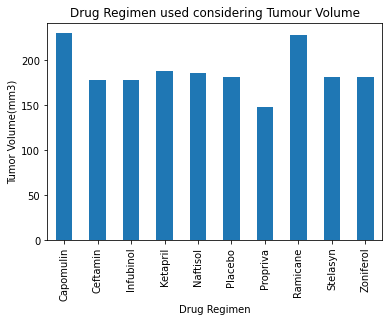

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_chart = group_data["Tumor Volume (mm3)"].count()
bar_chart.plot(kind="bar",ylabel= "Tumor Volume(mm3)",title= "Drug Regimen used considering Tumour Volume")
plt.show()

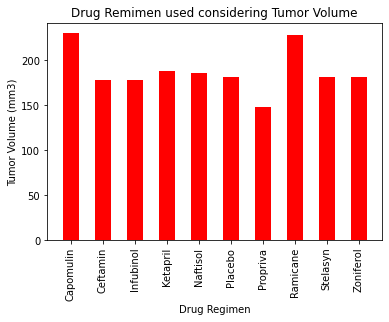

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = bar_chart.index
y_axis = group_data["Tumor Volume (mm3)"].count()
plt.bar(x_axis,y_axis, color ="r",width =0.5)
plt.xticks(rotation=90)
plt.title("Drug Remimen used considering Tumor Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

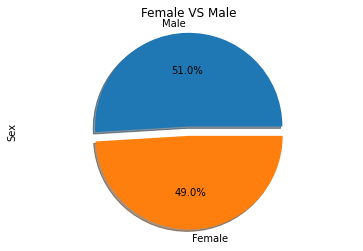

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_chart= clean_data["Sex"].value_counts()
explode= [0.1,0]
sex_chart.plot(kind="pie",title="Female VS Male",autopct="%1.1f%%",shadow=True,explode=explode)
plt.axis("equal")
plt.show()


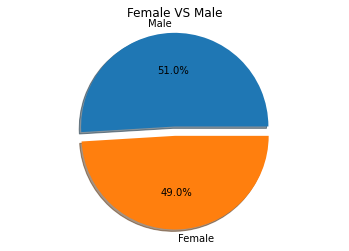

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=["Male","Female"]
explode=[0.1,0]
plt.pie(sex_chart,labels=label,autopct="%1.1f%%",shadow=True,explode=explode)
plt.axis("equal")
plt.title("Female VS Male")
plt.show()


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

group_mouse = clean_data.groupby("Mouse ID") 

# Start by getting the last (greatest) timepoint for each mouse
group_mouse = group_mouse["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mouse = pd.merge(merge_data,group_mouse, on=["Mouse ID", "Timepoint"])

merge_mouse.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


In [127]:
# Put treatments into a list for for loop (and later for plot labels)

#List of four Drugs for calculation...
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drug:
    treat_df = merge_mouse.loc[merge_mouse["Drug Regimen"] == d]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(treat_df["Tumor Volume (mm3)"])
    
    # add subset 

    # Determine outliers using upper and lower bounds
    quartiles = treat_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    print(f"The Lower quartiles is: {round(lower_q,2)}")
    print(f"The Upper quartiles is: {round(upper_q,2)}")
    iqr = upper_q - lower_q
    print(f"The interquartile range is: {round(iqr,2)}")
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    print(f"The Lower Bound is: {round(lower_bound,2)}")
    print(f"The Upper Bound is:{round(upper_bound,2)}")
    outliners = treat_df.loc[(treat_df["Tumor Volume (mm3)"]<lower_bound) | (treat_df["Tumor Volume (mm3)"]>upper_bound)]
    print(f"{d} Potential Outliners: {outliners}")
    

The Lower quartiles is: 32.38
The Upper quartiles is: 40.16
The interquartile range is: 7.78
The Lower Bound is: 20.7
The Upper Bound is:51.83
Capomulin Potential Outliners: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
The Lower quartiles is: 31.56
The Upper quartiles is: 40.66
The interquartile range is: 9.1
The Lower Bound is: 17.91
The Upper Bound is:54.31
Ramicane Potential Outliners: Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
The Lower quartiles is: 54.05
The Upper quartiles is: 65.53
The interquartile range is: 11.48
The Lower Bound is: 36.83
The Upper Bound is:82.74
Infubinol Potential Outliners:    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
74     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
74           36

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol[0]

1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
loc_mouse= clean_data.loc[clean_data["Drug Regimen"]== "Capomulin"]
loc_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
